In [15]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [16]:
# values and attributes should be list
def plotBarRepresentation(fig_size, values, attributes, namePlot, legendName, attributes_with_performance):

    # Figure Size
    fig, ax = plt.subplots(figsize = fig_size)
    
    # Horizontal Bar Plot
    ax.barh(attributes, values)
    
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    
    # Show top values 
    ax.invert_yaxis()
    
    # Add annotation to bars
    for i, attribute in zip(ax.patches, attributes):
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')
        print(attribute)
        #print(attributes_with_performance['ma'][attribute])
        plt.text(i.get_width()+300, i.get_y()+0.5, 
                ("ma: %.3f" % attributes_with_performance['ma'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='black')
        plt.text(i.get_width()+700, i.get_y()+0.5, 
                ("acc: %.3f" % attributes_with_performance['acc'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='red')
        plt.text(i.get_width()+1100, i.get_y()+0.5, 
                ("f1: %.3f" % attributes_with_performance['f1'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='green')
        plt.text(i.get_width()+1400, i.get_y()+0.5, 
                ("prec: %.3f" % attributes_with_performance['prec'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='orange')
    
    # Add Plot Title
    ax.set_title(legendName,
                loc ='left', )
    

    plt.savefig(namePlot) 

In [17]:
pathToAppearsTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPv2/RAPv2_test0.csv'
pathToAppearsVal = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPv2/RAPv2_val0.csv'
pathToAppearsTrain = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPv2/RAPv2_train0.csv'

pathToMaTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_ma_labels.csv'
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_f1_labels.csv'
pathToAccTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_acc_labels.csv'
pathToPrecTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_prec_labels.csv'

In [18]:
test_dt = pd.read_csv(pathToAppearsTest, sep='\t', index_col=False)

test_dt_ma = pd.read_csv(pathToMaTest, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=',', index_col=False)
test_dt_acc = pd.read_csv(pathToAccTest, sep=',', index_col=False)
test_dt_prec = pd.read_csv(pathToPrecTest, sep=',', index_col=False)

In [19]:
test_dt_f1.columns

Index(['run_id', 'key', 'value', 'step', 'timestamp'], dtype='object')

In [24]:
strMa = 'testing_*_ma_*'
strNotMa = 'testing_ma_605'
notColumn = 'Unnamed: 0'
#attributes = list(test_dt.columns)
# Age46-60 is not in eval
listAttributesRAPzs = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Femal','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']

attributes=listAttributesRAPzs

#attributes.remove(notColumn)

# fix this
#attributes.remove('HoldObjectsInFront')
#attributes.remove('UpperSplice')

bestStep = 9

attributes_with_performance = {}
attributes_with_performance['ma'] = {}
attributes_with_performance['f1'] = {}
attributes_with_performance['acc'] = {}
attributes_with_performance['prec'] = {}
for attribute in attributes:
    for typeKey in test_dt_ma['key'].unique():
        if attribute in typeKey:
            value = test_dt_ma[(test_dt_ma['key'] == typeKey) & (test_dt_ma['step'] == bestStep)]['value']
            attributes_with_performance['ma'][attribute] = float(value)
        # this elif is because the mlflow metric does not accept & and the original attribute is skirt&dress
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_ma[(test_dt_ma['key'] == typeKey) & (test_dt_ma['step'] == bestStep)]['value']
            attributes_with_performance['ma'][attribute] = float(value)

    for typeKey in test_dt_f1['key'].unique():
        if attribute in typeKey:
            value = test_dt_f1[(test_dt_f1['key'] == typeKey) & (test_dt_f1['step'] == bestStep)]['value']
            attributes_with_performance['f1'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_f1[(test_dt_f1['key'] == typeKey) & (test_dt_f1['step'] == bestStep)]['value']
            attributes_with_performance['f1'][attribute] = float(value)

    for typeKey in test_dt_acc['key'].unique():
        if attribute in typeKey:
            value = test_dt_acc[(test_dt_acc['key'] == typeKey) & (test_dt_acc['step'] == bestStep)]['value']
            attributes_with_performance['acc'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_acc[(test_dt_acc['key'] == typeKey) & (test_dt_acc['step'] == bestStep)]['value']
            attributes_with_performance['acc'][attribute] = float(value)

    for typeKey in test_dt_prec['key'].unique():
        if attribute in typeKey:
            value = test_dt_prec[(test_dt_prec['key'] == typeKey) & (test_dt_prec['step'] == bestStep)]['value']
            attributes_with_performance['prec'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_prec[(test_dt_prec['key'] == typeKey) & (test_dt_prec['step'] == bestStep)]['value']
            attributes_with_performance['prec'][attribute] = float(value)

In [25]:
test_dt_ma['key'].unique()

array(['learning_rate_605', 'testing_hs-BaldHead_ma_605',
       'testing_hs-LongHair_ma_605', 'testing_hs-BlackHair_ma_605',
       'testing_hs-Hat_ma_605', 'testing_hs-Glasses_ma_605',
       'testing_ub-Shirt_ma_605', 'testing_ub-Sweater_ma_605',
       'testing_ub-Vest_ma_605', 'testing_ub-TShirt_ma_605',
       'testing_ub-Cotton_ma_605', 'testing_ub-Jacket_ma_605',
       'testing_ub-SuitUp_ma_605', 'testing_ub-Tight_ma_605',
       'testing_ub-Others_ma_605', 'testing_ub-ShortSleeve_ma_605',
       'testing_lb-LongTrousers_ma_605', 'testing_lb-Skirt_ma_605',
       'testing_lb-ShortSkirt_ma_605', 'testing_lb-Jeans_ma_605',
       'testing_lb-Dress_ma_605', 'testing_shoes-Leather_ma_605',
       'testing_lb-TightTrousers_ma_605', 'testing_shoes-Sports_ma_605',
       'testing_shoes-Casual_ma_605', 'testing_shoes-Boots_ma_605',
       'testing_shoes-Cloth_ma_605', 'testing_shoes-Other_ma_605',
       'testing_attachment-Backpack_ma_605',
       'testing_attachment-ShoulderBag_ma_6

In [26]:
attributes_with_performance['ma']

{'hs-BaldHead': 0.9007229999999999,
 'hs-LongHair': 0.9682870000000001,
 'hs-BlackHair': 0.917904,
 'hs-Hat': 0.957139,
 'hs-Glasses': 0.93121,
 'ub-Shirt': 0.960578,
 'ub-Sweater': 0.864567,
 'ub-Vest': 0.9772040000000001,
 'ub-TShirt': 0.899001,
 'ub-Cotton': 0.94642,
 'ub-Jacket': 0.943077,
 'ub-SuitUp': 0.932068,
 'ub-Tight': 0.892275,
 'ub-ShortSleeve': 0.938232,
 'ub-Others': 0.5,
 'lb-LongTrousers': 0.96175,
 'lb-Skirt': 0.963559,
 'lb-ShortSkirt': 0.970083,
 'lb-Dress': 0.9607319999999999,
 'lb-Jeans': 0.971892,
 'lb-TightTrousers': 0.971024,
 'shoes-Leather': 0.9244889999999999,
 'shoes-Sports': 0.88285,
 'shoes-Boots': 0.9744649999999999,
 'shoes-Cloth': 0.895016,
 'shoes-Casual': 0.784066,
 'shoes-Other': 0.5,
 'attachment-Backpack': 0.894541,
 'attachment-ShoulderBag': 0.938213,
 'attachment-HandBag': 0.9112309999999999,
 'attachment-Box': 0.9361450000000001,
 'attachment-PlasticBag': 0.874992,
 'attachment-PaperBag': 0.651736,
 'attachment-HandTrunk': 0.9712780000000001,
 

/home/paa/.conda/envs/rethinking/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


hs-BaldHead
hs-LongHair
hs-BlackHair
hs-Hat
hs-Glasses
ub-Shirt
ub-Sweater
ub-Vest
ub-TShirt
ub-Cotton
ub-Jacket
ub-SuitUp
ub-Tight
ub-ShortSleeve
ub-Others
lb-LongTrousers
lb-Skirt
lb-ShortSkirt
lb-Dress
lb-Jeans
lb-TightTrousers
shoes-Leather
shoes-Sports
shoes-Boots
shoes-Cloth
shoes-Casual
shoes-Other
attachment-Backpack
attachment-ShoulderBag
attachment-HandBag
attachment-Box
attachment-PlasticBag
attachment-PaperBag
attachment-HandTrunk
attachment-Other
AgeLess16
Age17-30
Age31-45
Femal
BodyFat
BodyNormal
BodyThin
Customer
Employee
action-Calling
action-Talking
action-Gathering
action-Holding
action-Pushing
action-Pulling
action-CarryingByArm
action-CarryingByHand
action-Other


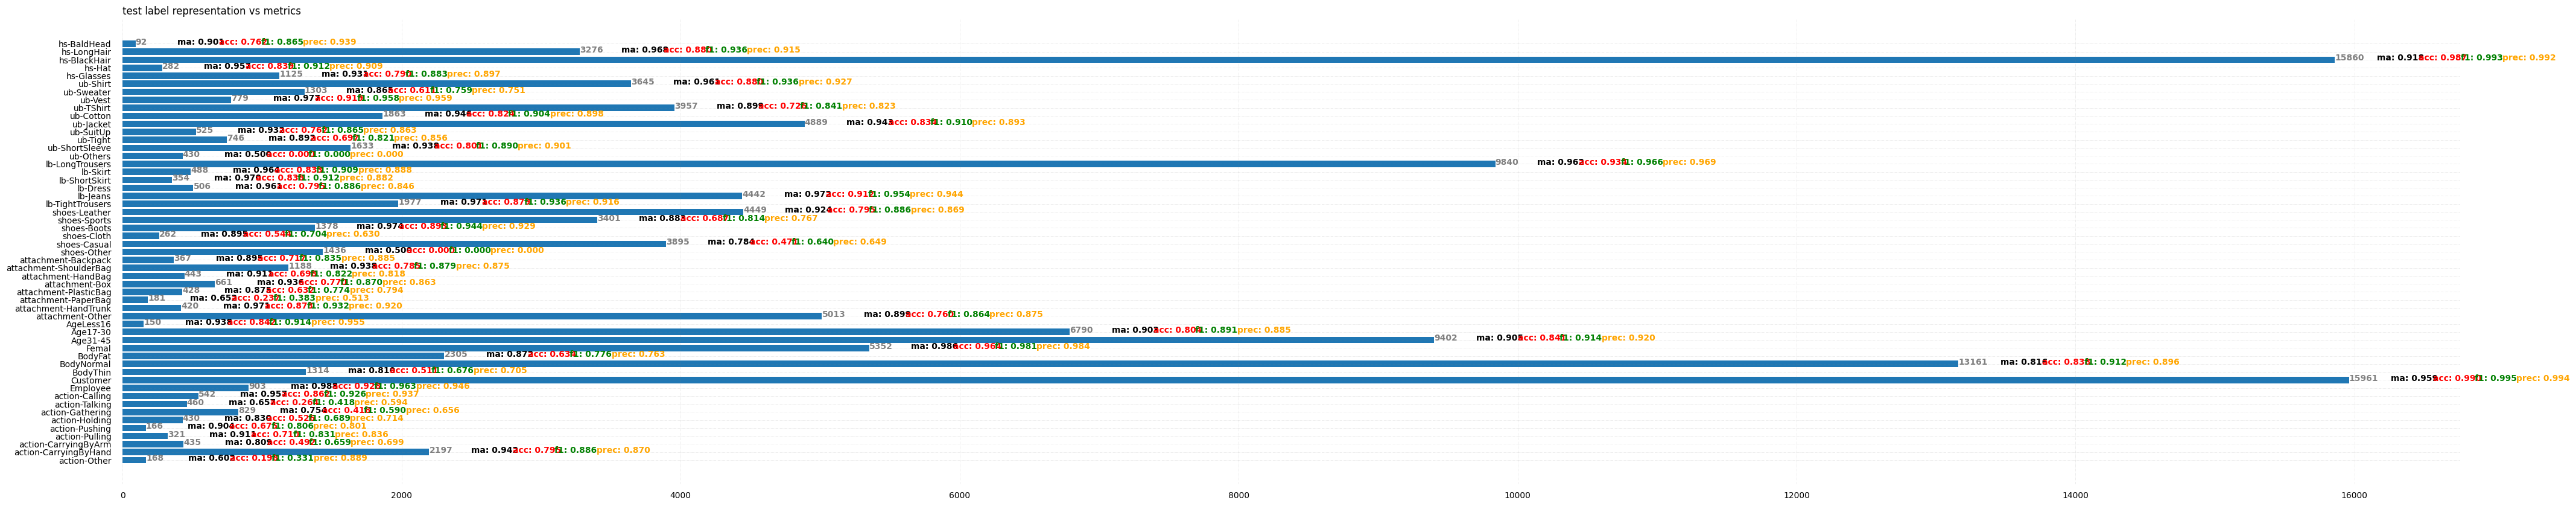

In [27]:
folderToSave="RAPzs/"
values = list(test_dt[attributes].sum())
attributes = attributes
namePlot = folderToSave+'testingperformance_vs_labelrepresentation.png'
legendName = 'test label representation vs metrics'
fig_size = (50, 10)
#plotBarRepresentation(fig_size, values, attributes, namePlot, legendName)
plotBarRepresentation(fig_size, values, attributes, namePlot, legendName, attributes_with_performance)